In [1]:
import numpy as np
import pandas as pd
from MRF import *

In [2]:
X = pd.read_csv("/users/ryanlucas/Desktop/test.csv", index_col = "date")

In [3]:
### Dependent Variable
y_pos = 0

### Exogenous Variables
# x_vars = [2,3,4,5]
# x_vars = ["F_1.l1", "F_2.l1", "PAYEMS.l1"]
x_pos = [21, 731]

In [5]:
MRF = MacroRandomForest(data = X, 
                        y_pos = y_pos, 
                        x_pos = x_pos, 
                        B = 10, 
                        parallelise = True, 
                        n_cores = 3, 
                        resampling_opt = 2, 
                        oos_pos = np.arange(len(X) - 12 , len(X)), 
                        trend_push = 2, 
                        quantile_rate = 0.3, 
                        ridge_lambda=0.001, 
                        rw_regul=0.9, 
                        print_b = True, 
                        fast_rw = False)

In [6]:
MRF_output = MRF._ensemble_loop()

Tree 2 out of 10
Tree 3 out of 10
Tree 1 out of 10
Tree 4 out of 10
Tree 5 out of 10


KeyError: 7

In [ ]:
pred = MRF_output['pred']

In [ ]:
pred

,Ensembled_Prediction
169,0.003268


In [ ]:
y = float(149629 * np.cumprod(np.exp(pred.iloc[-1])) - 149629)

In [ ]:
y

489.8096343642683

In [ ]:
d = [149629 * np.exp(float(value)) - 149629 for value in MRF_output['pred_ensemble']]

In [ ]:
stats.median(d)

510.3906743621628

/Users/ryanlucas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


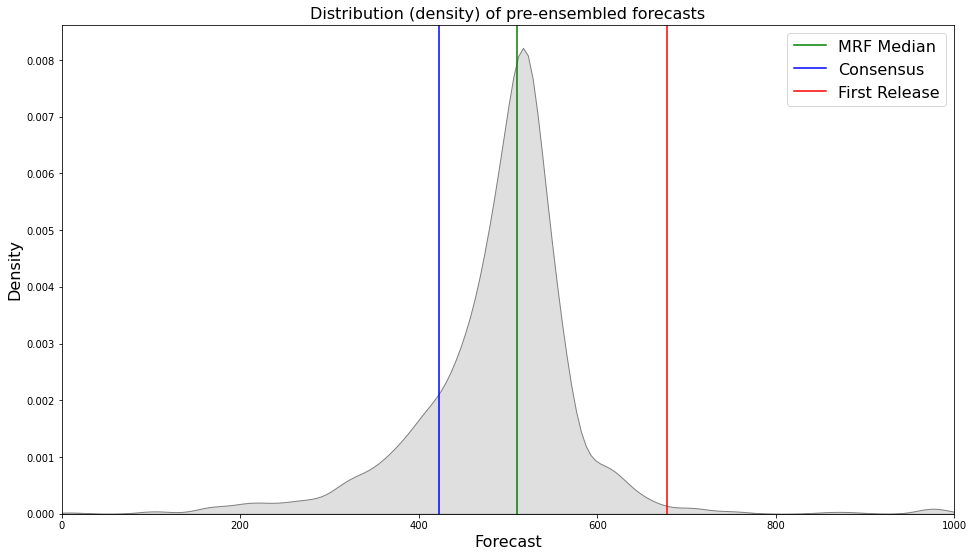

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(d, ax = ax, color = 'grey', shade = True, bw = 0.2)

fig.set_size_inches([16, 9])
ax.set_xlabel("Forecast", fontsize = 16)
ax.set_ylabel("Density", fontsize = 16)
ax.set_xlim([0, 1000])
ax.axvline(stats.median(d), color = 'green', label = "MRF Median")
ax.axvline(423, color = 'blue', label = "Consensus")
ax.axvline(678, color = 'red', label = "First Release")
ax.set_title("Distribution (density) of pre-ensembled forecasts", fontsize = 16)
ax.legend(fontsize = 16)

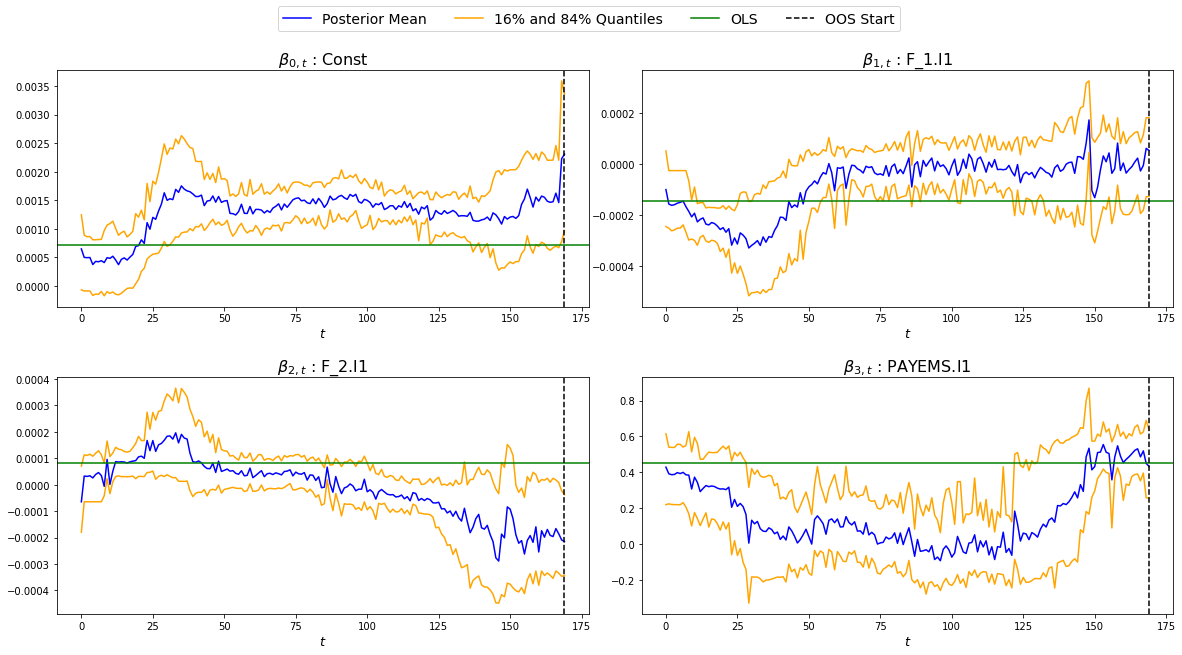

In [ ]:
MRF.band_plots()